# Importing libraries
**pandas** for data manipulation and analysis <br>
**numpy** for numerical computing <br>
**matplotlib** for printing graphs <br>
**sklearn.metrics** for 'accuracy_score' function <br>
**train_test_split** for splitting data <br>
**DecisionTreeClassifier** for predictions with decision tree <br>
**KNeighborsClassifier** for predictions with KNN <br>
**MinMaxScaler** for normalize data <br>
**StandardScaler** for normalize data <br>
**ParameterGrid** for easier hyperparameter testing <br>
**seaborn** for correlation matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Helps plotting graphs (source: BI-ML1, first notebook: 01_tutorial_cs_template)
%matplotlib inline

# Check dataset

* Look at number of columns and rows
    * columns: 13
    * rows: 1000
* Find types of datatypes
    * *int64, object, float64*
* Check how missing values are represented
    * *NaN*

In [2]:
# Load data.csv into data
data = pd.read_csv("data.csv")
print("First 10 records\n-----------------")
display(data.head(10))
print("Basic info\n-----------------")
display(data.info())
print("Number of uniques records\n-----------------")
display(data.nunique())

First 10 records
-----------------


,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,NaN
1,1,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,"Australia Fingal, ND"
2,2,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,Belfast
3,3,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
4,4,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,"New York, NY"
5,5,0,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C,NaN
6,6,0,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,"New York, NY"
7,7,1,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S,"Greenport, NY"
8,8,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,"New York, NY"
9,9,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S,"Norwich / New York, NY"


Basic info
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      222 non-null    object 
 11  embarked   999 non-null    object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


None

Number of uniques records
-----------------


ID           1000
survived        2
pclass          3
name          999
sex             2
age            94
sibsp           7
parch           7
ticket        754
fare          249
cabin         156
embarked        3
home.dest     314
dtype: int64

### Look at survival, sex, embarked rate

* Survive
    * 609 died, 391 survived
* Sex
    * 646 males, 354 females
* Embarked
    * 695 S, 207 C, 97 Q

0    609
1    391
Name: survived, dtype: int64 

male      646
female    354
Name: sex, dtype: int64 

S    695
C    207
Q     97
Name: embarked, dtype: int64 



([<matplotlib.patches.Wedge at 0x7f262ddc9e80>,
 [Text(-0.6344712283063437, 0.8985801357983826, 'C'),
  Text(0.33530954969405985, -1.0476485602929864, 'Q'),
  Text(1.0492185885766259, -0.3303639710762557, 'S')],
 [Text(-0.3460752154398238, 0.4901346195263904, '69.6%'),
  Text(0.18289611801494174, -0.5714446692507197, '20.7%'),
  Text(0.5723010483145231, -0.18019852967795766, '9.7%')])

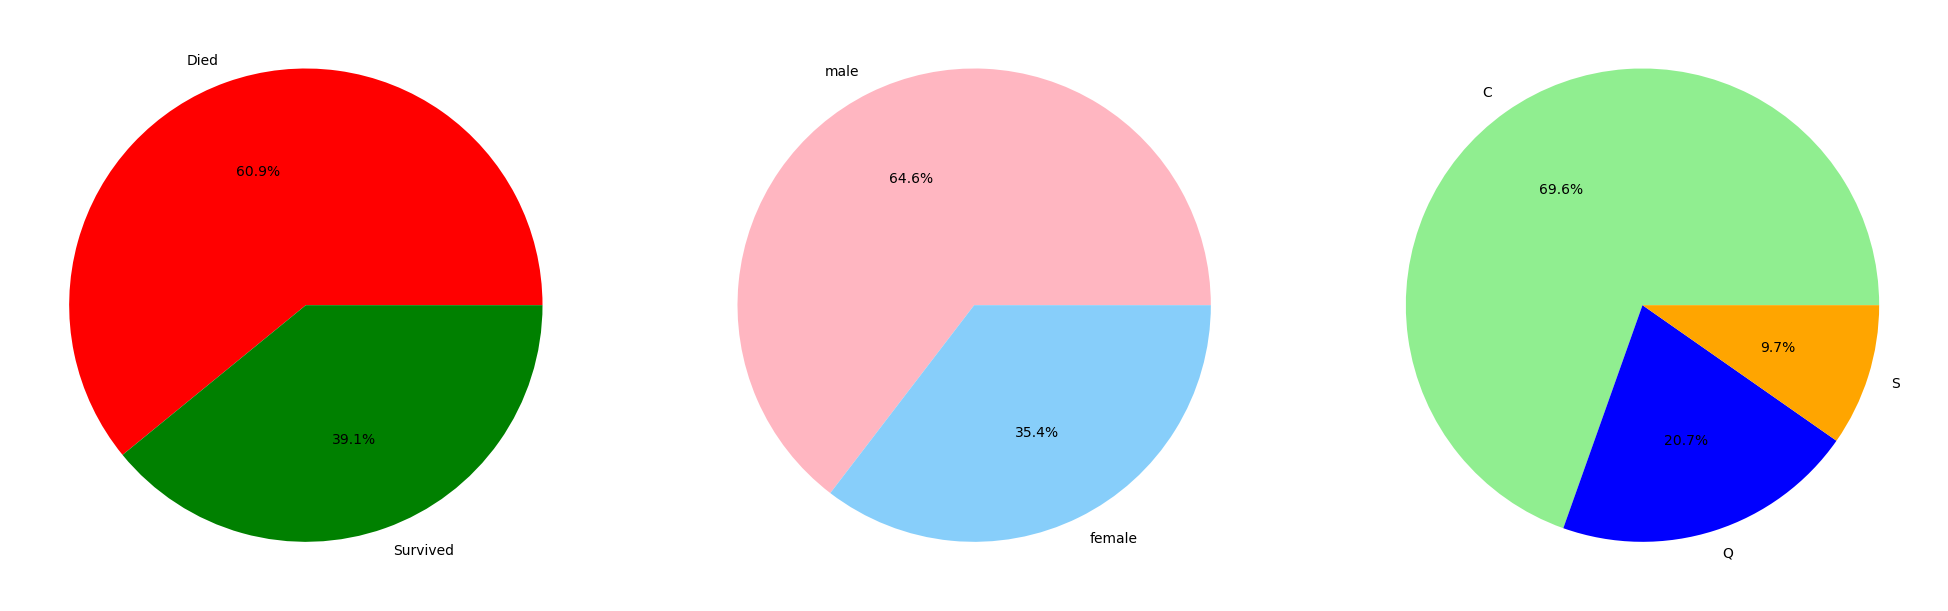

In [3]:
# Get values of survived (0 = died, 1 = survived)
survival_rate = data.survived.value_counts()
print(survival_rate, "\n")

# Create survive labels
sur_labels = ['Died', 'Survived']

# Get values of sex ('male', 'female')
sex_rate = data.sex.value_counts()
print(sex_rate, "\n")

# Create age labels
sex_labels = ['male', 'female']
# Get values of cabin ('male', 'female')
embarked_rate = data.embarked.value_counts()
print(embarked_rate, "\n")

# Create age labels
embarked_labels = ['C', 'Q', 'S']

fig = plt.figure(figsize=(20,6), constrained_layout=True)
ax1 = fig.add_subplot(1,3,1)
ax1.pie(survival_rate, labels=sur_labels, autopct='%1.1f%%', colors=['red', 'green'])
ax2 = fig.add_subplot(1,3,2)
ax2.pie(sex_rate, labels=sex_labels, autopct='%1.1f%%', colors=['lightpink', 'lightskyblue'])
ax3 = fig.add_subplot(1,3,3)
ax3.pie(embarked_rate, labels=embarked_labels, autopct='%1.1f%%', colors=['lightgreen', 'blue', 'orange'])

# Decide what columns we remove
We want to predict if person survived or not:

* **ID, name**: dont tell us any important information

* **cabin**: we dont know which cabins were closer to lifeboats

* **ticket**: we dont know what information is on ticket (probably name, cabin number and so on)


* **home.dest**: we predict survival rate so there is no final destination (boat never arrived)

# Preparing dataset
* Decide what to do with columns we wont need
    * remove **ID, name, ticket, fare, cabin, home.dest** from dataset
* Decide what to do with *NaN* values
    * **age**: *NaN* values -> **-1**
    * **embarked**: it has 1 row -> remove it
    * **fare**: it has 1 row -> remove it
* Change object datatypes:
    * *Ordinal = object -> category -> use: cat.codes*
    * *Nominal = one-hot encoding -> use: pd.get_dummies()*
    * **sex** and **embarker** are nominal

In [4]:
# Drop columns we wont need
from cgi import test


drop_columns = ['name', 'ticket', 'cabin', 'home.dest']
test_data = data.drop(drop_columns, axis = 1)

# Set index equal to ID and drop that column
test_data = test_data.set_index('ID', drop = True)

# Get number of NaN values for each column
print(test_data.isnull().sum(), "\n")

# Drop embarked and fare rows with NaN values (both have just 1)
test_data = test_data[test_data['embarked'].notna()]
test_data = test_data[test_data['fare'].notna()]

# Change NaN values to -1 -> we only miss values in age column
test_data = test_data.fillna(-1)

# Check filled NaN values
display(test_data.head())

# Columns sex and embarked are nominal
test_data = pd.get_dummies(test_data)

# See prepared data
display(test_data.head())

survived      0
pclass        0
sex           0
age         203
sibsp         0
parch         0
fare          1
embarked      1
dtype: int64 



,survived,pclass,sex,age,sibsp,parch,fare,embarked
ID,,,,,,,,
0,1,3,male,27.0,0,0,7.7958,S
1,1,3,male,45.0,0,0,8.0500,S
2,0,2,male,-1.0,0,0,0.0000,S
3,1,3,female,27.0,0,2,11.1333,S
4,0,1,male,28.0,1,0,82.1708,C


,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
ID,,,,,,,,,,,
0,1,3,27.0,0,0,7.7958,0,1,0,0,1
1,1,3,45.0,0,0,8.0500,0,1,0,0,1
2,0,2,-1.0,0,0,0.0000,0,1,0,0,1
3,1,3,27.0,0,2,11.1333,1,0,0,0,1
4,0,1,28.0,1,0,82.1708,0,1,1,0,0


# Correlation matrix from test_data

<AxesSubplot:>

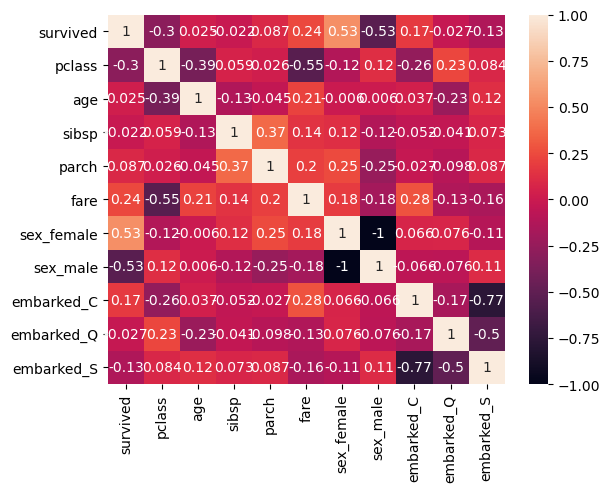

In [5]:
# Create correlation graph
corelmat = test_data.corr()
sns.heatmap(corelmat, annot=True)

# Prepare explained variable and datasets

* Split data into train, validation and test datasets
    * split data: 50% train and 50% rest
    * split rest: 50% valid and 50% test

In [6]:
random_seed = 333

# Get rid of explained variable in Xdatasets and save explained variable to ydatasets
Xdata = test_data.drop("survived", axis = 1)
ydata = test_data.survived

# Split data: 50% for train data, 50% rest
Xtrain, Xrest, ytrain, yrest = train_test_split(Xdata, ydata, test_size=0.5, random_state=random_seed) 
print("Xtrain: ", Xtrain.shape, "\nytrain: ", ytrain.shape, "\nXtest: ", Xrest.shape, "\nytest: ", yrest.shape, "\n")

# Split rest of data (50%) into valid and test data, 50%/50%
Xval, Xtest, yval, ytest = train_test_split(Xrest, yrest, test_size=0.5, random_state=random_seed) 
print("Xval: ", Xval.shape, "\nyval: ", yval.shape, "\nXtest: ", Xtest.shape, "\nytest: ", ytest.shape)

Xtrain:  (499, 10) 
ytrain:  (499,) 
Xtest:  (499, 10) 
ytest:  (499,) 

Xval:  (249, 10) 
yval:  (249,) 
Xtest:  (250, 10) 
ytest:  (250,)


# Decision tree
### Find best hyperparameters and let model learn

* Find best values for these hyperparameters (test all cases):
    * Depth = {1, 30}
    * Criterion = {entropy, gini}
* Learn model
    * Use best parameters and fit to train dataset
* Show results
    * Plot graph
    * Show accuracy

Best_params: {'max_depth': 3, 'criterion': 'entropy'} 

Accuracy score (train): 0.8156
Accuracy score (validation): 0.7791
Accuracy score (test): 0.7880


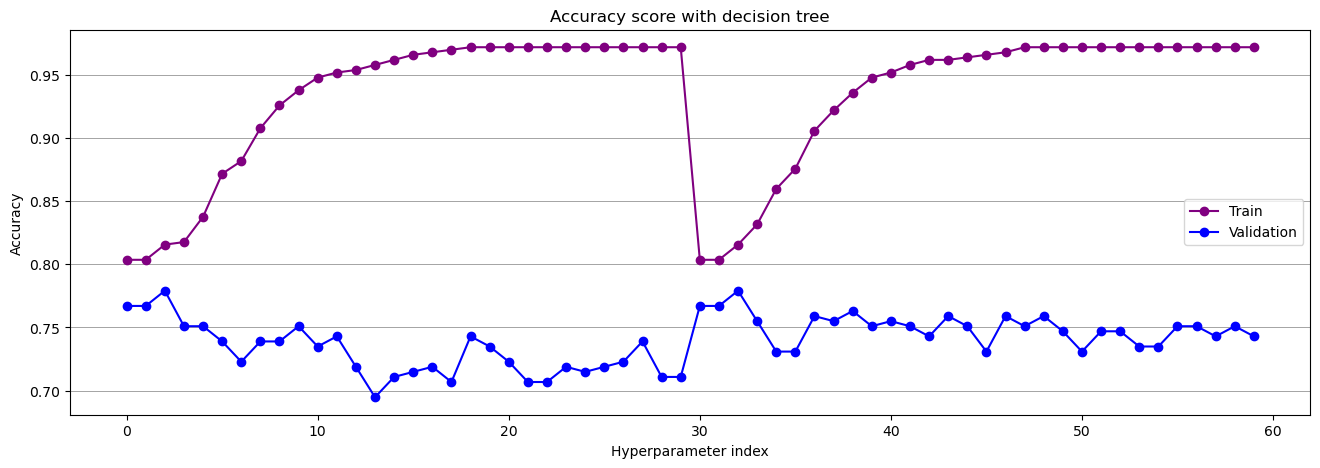

In [7]:
# Find best hyperparameters (depths, criterions)
get_param = {'max_depth': range(1,31), 'criterion': ['entropy', 'gini']}
param_comb = ParameterGrid(get_param)

# Try all combinations (depth * criterions)
valid_acc = []
train_acc = []
for get_param in param_comb:
    dec_tree = DecisionTreeClassifier(max_depth=get_param['max_depth'], criterion=get_param['criterion'])
    dec_tree.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dec_tree.predict(Xtrain)))
    valid_acc.append(metrics.accuracy_score(yval, dec_tree.predict(Xval)))

# Get best parameters from function above
best_param = param_comb[np.argmax(valid_acc)]
print("Best_params:", best_param, "\n")

# Train our model with best hyperparameters
dec_tree = DecisionTreeClassifier(**best_param)
dec_tree.fit(Xtrain, ytrain)

# Save our test prediction for later comparisons
tree_pred = metrics.accuracy_score(ytest, dec_tree.predict(Xtest))

# Plot grapth
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(train_acc, 'o-', color='purple')
ax.plot(valid_acc, 'o-', color='blue')
ax.grid(axis='y', color='black', alpha=.5, linewidth=.5)
ax.set_title('Accuracy score with decision tree')
plt.xlabel('Hyperparameter index')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='center right')

# Print our accuracies
print('Accuracy score (train): {0:.4f}'.format(metrics.accuracy_score(ytrain, dec_tree.predict(Xtrain))))
print('Accuracy score (validation): {0:.4f}'.format(metrics.accuracy_score(yval, dec_tree.predict(Xval))))
print('Accuracy score (test): {0:.4f}'.format(metrics.accuracy_score(ytest, dec_tree.predict(Xtest))))

# KNN
### KNN without normalized data
* Find best values for these hyperparameters (test all cases):
    * Number of neighbors = {3, 20}
* Learn model
    * Use best parameters and fit to train dataset
* Show results
    * Plot graph
    * Show accuracy

Best_neighbors: 6 

Accuracy score (train): 0.7435
Accuracy score (validation): 0.6466
Accuracy score (test): 0.6760


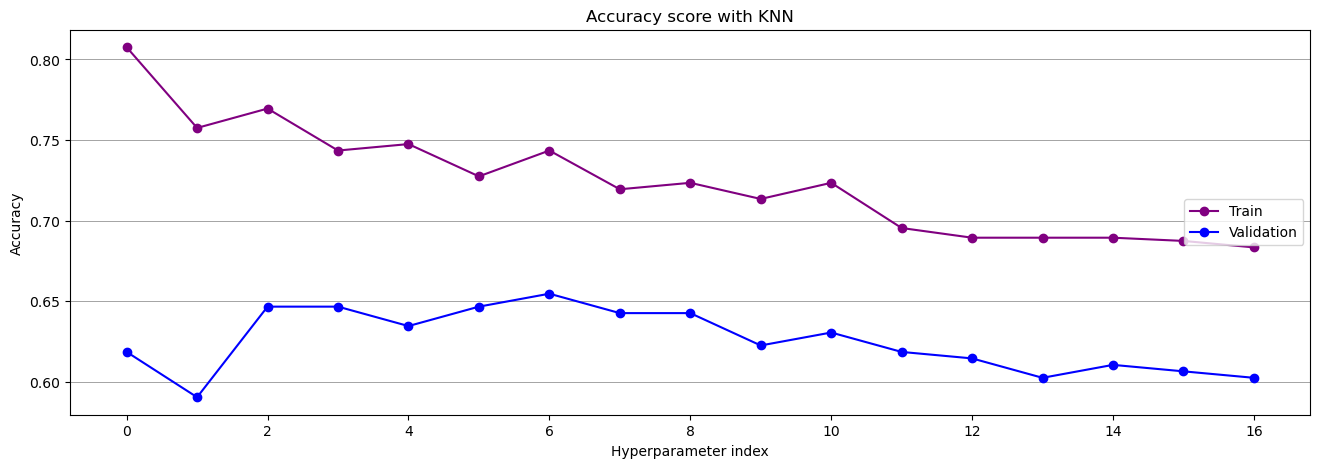

In [8]:
# Function that creates and plots KNN model and returns best number of neighbors
def get_neighbors(Xtrain, Xval):
    valid_acc_knn = []
    train_acc_knn = []
    neighbors_range = range(3, 20)
    # Find how many neighbors are best for model
    for k in neighbors_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(Xtrain, ytrain)
        valid_acc_knn.append(knn.score(Xval, yval))
        train_acc_knn.append(knn.score(Xtrain, ytrain))
    # Get number of best neighbors
    neighbor = np.argmax(valid_acc_knn)
    print("Best_neighbors:", neighbor, "\n")
    # Plot grapth
    fig, ax = plt.subplots(figsize=(16,5))
    ax.plot(train_acc_knn, 'o-', color='purple')
    ax.plot(valid_acc_knn, 'o-', color='blue')
    ax.grid(axis='y', color='black', alpha=.5, linewidth=.5)
    ax.set_title('Accuracy score with KNN')
    plt.xlabel('Hyperparameter index')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='center right')
    # Get best number of neighbors
    return neighbor

# Find best number of neighbors for out train and validation data
best_neighbors = get_neighbors(Xtrain, Xval)

# Train our model with best hyperparameters
knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(Xtrain, ytrain)

# Save our test prediction for later comparisons
knn_not_norml = metrics.accuracy_score(ytest, knn.predict(Xtest))

# Print our accuracies
print('Accuracy score (train): {0:.4f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('Accuracy score (validation): {0:.4f}'.format(metrics.accuracy_score(yval, knn.predict(Xval))))
print('Accuracy score (test): {0:.4f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

### Normalize data
* Choose better method based on their accuracy
    * MinMaxScaler
    * StandardScaler

In [9]:
# Use Min-max scaler to train and validation data 
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

# Use KNN on normalized data
knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(Xtrain_scaled, ytrain)
minMax_acc = knn.score(Xval_scaled, yval)

print('Accuracy score (MinMaxScaler): {0:.4f}'.format(knn.score(Xval_scaled, yval)))

# Use StandardScaler to train and validation data 
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

# Use KNN on normalized data
knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(Xtrain_scaled, ytrain)
standart_acc = knn.score(Xval_scaled, yval)

print('Accuracy score (StandardScaler): {0:.4f}'.format(knn.score(Xval_scaled, yval)))

# Get best method
if minMax_acc >= standart_acc:
    scaler = MinMaxScaler()
else:
    scaler = StandardScaler()

# Scale data with best method
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

Accuracy score (MinMaxScaler): 0.7831
Accuracy score (StandardScaler): 0.7590


### KNN with normalized data
* Learn model with normalized data
    * Find new best number of neighbors
* Normalize test data
* Show results
    * Plot graph
    * Show accuracy

Best_neighbors: 7 

Accuracy score (StandardScaler): 0.8120
Accuracy accuracy_score (StandardScaler): 0.8120


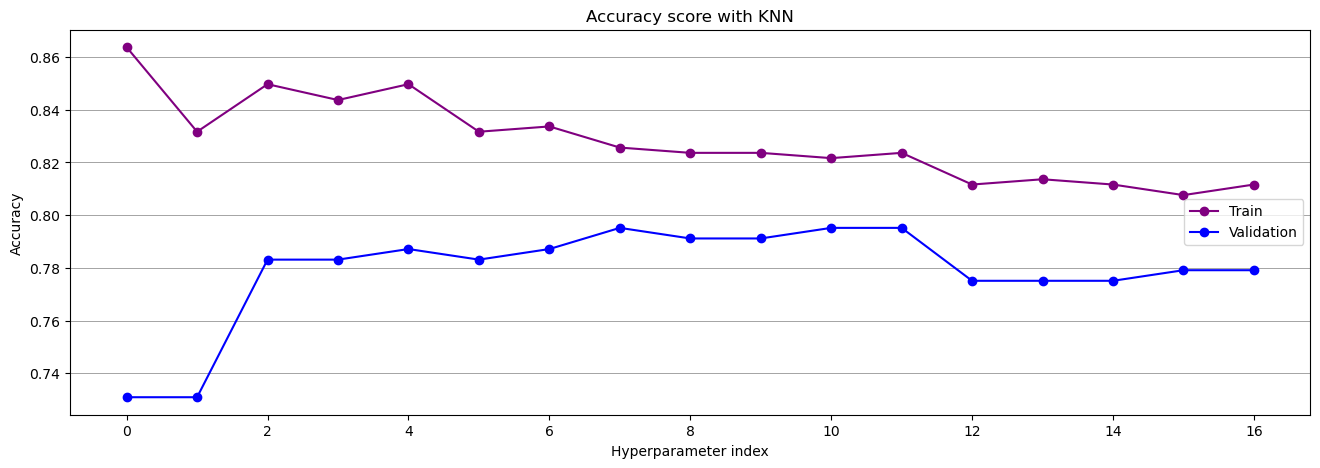

In [13]:
# Find best hyperparameters with normalized data
best_neighbors = get_neighbors(Xtrain_scaled, Xval_scaled)

# Use KNN on normalized data with best k_neighbor
knn = KNeighborsClassifier(n_neighbors = best_neighbors)
knn.fit(Xtrain_scaled, ytrain)

# Normalize Xtest data (our data for test)
Xtest_scaled = scaler.fit_transform(Xtest)

# Save our test prediction
knn_norml = metrics.accuracy_score(ytest, knn.predict(Xtest_scaled))

print('Accuracy score (StandardScaler): {0:.4f}'.format(knn.score(Xtest_scaled, ytest)))
print('Accuracy accuracy_score (StandardScaler): {0:.4f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest_scaled))))

### Choose better prediction model
* Flag:
    * 1 -> KNN
    * 0 -> decision tree
* *(assuming KNN with normalized data is better then normal KNN)*

In [14]:
flag = 0
# Choose decision tree or KNN for prediction (we normalize data with KNN otherwise we dont)
if knn_norml >= tree_pred:
    flag = 1

print("\nFlag is: ", flag)


Flag is:  1


# Predict evaluation.csv
* Prepare evaluation.csv data same way as data.csv

In [15]:
# Load evaluation.csv into eval_data
eval_data = pd.read_csv("evaluation.csv")

# Check if dataset doesnt have something different (columns, new 'object' datatypes)
display(eval_data.head())

# Drop columns we wont need
eval_data = eval_data.drop(drop_columns, axis = 1)

# Set index equal to ID and drop that column
eval_data = eval_data.set_index('ID', drop = True)

# Get number of NaN values for each column
print(eval_data.isnull().sum(), "\n")

# Drop embarked rows with NaN values
eval_data = eval_data[eval_data['embarked'].notna()]

# Change NaN values to -1
eval_data = eval_data.fillna(-1)

# Columns sex and embarked are nominal
eval_data = pd.get_dummies(eval_data)

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S,"Youngstown, OH"
1,1001,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,NaN
2,1002,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Scituate, MA"
3,1003,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S,NaN
4,1004,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q,NaN


pclass       0
sex          0
age         60
sibsp        0
parch        0
fare         0
embarked     1
dtype: int64 



### Predict **eval_data** with our best model and save it to results.csv
* Normalize data if needed (if we will predict with KNN)
* Save our prediction with 2 columns
    * ID, survived

In [16]:
if flag == 1:
    # Normalize eval_data before prediction
    eval_scaled = scaler.fit_transform(eval_data)
    # Predict with KNN
    eval_pred = knn.predict(eval_scaled)
else:
    # Predict with decision tree
    eval_pred = dec_tree.predict(eval_data)

# Save prediction to file results.csv
surv = pd.DataFrame(eval_pred, columns=["survived"])
idx = pd.DataFrame(eval_data.index, columns=["ID"])
sub = [idx.ID, surv.survived]
sub = pd.concat(sub, axis=1)
sub.to_csv("results.csv", index=False)
res = pd.read_csv('results.csv')
display(res.head())

,ID,survived
0,1000,1
1,1001,1
2,1002,1
3,1003,0
4,1004,0
